# What Restaurant to Open in Australia

This project helps the user to decide what restaurant to open in Australia by by exploring the most popular cuisines in Sydney and Melbourne.

# Introduction/Business Problem

The audience is an investor looking to open a restaurant in Australia. However, he/she does not know what type of cuisine would be popular or welcomed. To maximise the success rate of the restaurant, the investor would like to identify the most popular cuisines in Australia. The target audience is restaurant owners. They care about this because it determines the success of their new restaurants. 

# Data

We will retrieve restaurant data from Foursquare and find out the most popular types of cuisines. For the location, we will use data from the two biggest cities in Australia - Sydney and Melbourne. The Foursquare query will return the number of restaurant of each type of cuisines, we then visualise the data by ploting a bar graph. Example: In Sydney, Australia, the most opened restaurant might be Australian food. We would query Foursquare to return a json file, and then retrieve the number of Australian restaurants from the dataset. Features: We will use the features such as cities, cuisines and number of restaurants.

In [60]:
import pandas as pd
import requests

Foursquare Credentials

In [61]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20210106' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

URL = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, 5000)

To help the user decide what type of cuisines to open in Australia, we explore the most popular cuisines in two of the most popular cities in Australia - Sydney and Melbourne.

In [62]:
cities = ["Sydney, Australia", "Melbourne, Australia"]

We use the following categories retrived from the Foursquare website.

In [64]:
cuisines = {
    'Afghan': '503288ae91d4c4b30a586d67', 
    'African': '4bf58dd8d48988d1c8941735', 
    'American': '4bf58dd8d48988d14e941735', 
    'Burmese': '56aa371be4b08b9a8d573568', 
    'Cambodian': '52e81612bcbc57f1066b7a03', 
    'Chinese': '4bf58dd8d48988d145941735', 
    'Filipino': '4eb1bd1c3b7b55596b4a748f', 
    'Himalayan': '52e81612bcbc57f1066b79fb', 
    'Indonesian': '4deefc054765f83613cdba6f', 
    'Japanese': '4bf58dd8d48988d111941735', 
    'Korean': '4bf58dd8d48988d113941735', 
    'Malay': '4bf58dd8d48988d156941735', 
    'Mongolian': '4eb1d5724b900d56c88a45fe', 
    'Thai': '4bf58dd8d48988d149941735', 
    'Tibetan': '52af39fb3cf9994f4e043be9', 
    'Vietnamese': '4bf58dd8d48988d14a941735', 
    'Australian': '4bf58dd8d48988d169941735', 
    'Austrian': '52e81612bcbc57f1066b7a01', 
    'Bangladeshi': '5e179ee74ae8e90006e9a746', 
    'Belgian': '52e81612bcbc57f1066b7a02', 
    'Caribbean': '4bf58dd8d48988d144941735', 
    'Caucasian': '5293a7d53cf9994f4e043a45', 
    'Czech': '52f2ae52bcbc57f1066b8b81', 
    'Dutch': '5744ccdfe4b0c0459246b4d0', 
    'Belarusian': '52e928d0bcbc57f1066b7e97', 
    'Bosnian': '58daa1558bbb0b01f18ec1ee', 
    'Bulgarian': '56aa371be4b08b9a8d5734f3', 
    'Romanian': '52960bac3cf9994f4e043ac4', 
    'Tatar': '52e928d0bcbc57f1066b7e98', 
    'English': '52e81612bcbc57f1066b7a05', 
    'French': '4bf58dd8d48988d10c941735', 
    'German': '4bf58dd8d48988d10d941735', 
    'Greek': '4bf58dd8d48988d10e941735', 
    'Hawaiian': '52e81612bcbc57f1066b79fe', 
    'Hungarian': '52e81612bcbc57f1066b79fa', 
    'Indian': '4bf58dd8d48988d10f941735', 
    'Italian': '4bf58dd8d48988d110941735', 
    'Salvadoran': '5745c7ac498e5d0483112fdb', 
    'Argentinian': '4bf58dd8d48988d107941735', 
    'Brazilian': '4bf58dd8d48988d16b941735', 
    'Colombian': '58daa1558bbb0b01f18ec1f4', 
    'Peruvian': '4eb1bfa43b7b52c0e1adc2e8', 
    'Venezuelan': '56aa371be4b08b9a8d573558', 
    'Moroccan': '4bf58dd8d48988d1c3941735', 
    'Mexican': '4bf58dd8d48988d1c1941735', 
    'Egyptian': '5bae9231bedf3950379f89e1', 
    'Iraqi': '5bae9231bedf3950379f89e7', 
    'Israeli': '56aa371be4b08b9a8d573529', 
    'Kurdish': '5744ccdfe4b0c0459246b4ca', 
    'Lebanese': '58daa1558bbb0b01f18ec1cd', 
    'Persian': '52e81612bcbc57f1066b79f7', 
    'Syrian': '5bae9231bedf3950379f89da', 
    'Yemeni': '5bae9231bedf3950379f89ea', 
    'Pakistani': '52e81612bcbc57f1066b79f8', 
    'Polish': '52e81612bcbc57f1066b7a04', 
    'Portuguese': '4def73e84765ae376e57713a', 
    'Russian': '5293a7563cf9994f4e043a44', 
    'Scandinavian': '4bf58dd8d48988d1c6941735', 
    'Scottish': '5744ccdde4b0c0459246b4a3', 
    'Slovak': '56aa371be4b08b9a8d57355a', 
    'Spanish': '4bf58dd8d48988d150941735', 
    'Sri Lankan': '5413605de4b0ae91d18581a9', 
    'Swiss': '4bf58dd8d48988d158941735', 
    'Turkish': '4f04af1f2fb6e1c99f3db0bb', 
    'Ukranian': '52e928d0bcbc57f1066b7e96'
}

Query the city, cuisine and total number of each cuisine.

In [47]:
restaurants = pd.DataFrame(columns=['City', 'Cuisine', 'Number of restaurants'])
for city in cities:
    print(city)
    for cuisine_name, category_id in cuisines.items():
        query = requests.get("{url}&near={city}&categoryId={category_id}".format(url=URL, city=city, category_id=category_id))
        if query.status_code == 200:
            number = query.json()
            restaurants = restaurants.append({
                'City': city,
                'Cuisine': cuisine_name,
                'Number of restaurants': number['response']['totalResults']
            }, ignore_index=True)
        
restaurants

Sydney, Australia
Melbourne, Australia


,City,Cuisine,Number of restaurants
0,"Sydney, Australia",Afghan,4
1,"Sydney, Australia",African,11
2,"Sydney, Australia",American,66
3,"Sydney, Australia",Burmese,1
4,"Sydney, Australia",Cambodian,4
...,...,...,...
125,"Melbourne, Australia",Spanish,56
126,"Melbourne, Australia",Sri Lankan,7
127,"Melbourne, Australia",Swiss,5
128,"Melbourne, Australia",Turkish,34


One-hot Encoding

In [68]:
restaurants_onehot = pd.get_dummies(restaurants['Cuisine'], prefix="", prefix_sep="")
restaurants_onehot = restaurants_onehot.multiply(restaurants['Number of restaurants'], axis=0)
restaurants_onehot = pd.concat([restaurants['City'], restaurants_onehot], axis=1)

cuisines_city = restaurants_onehot.groupby('City').sum().reset_index()
cuisines_city = cuisines_city.set_index(keys='City')

Group by City

In [69]:
cuisines_city = restaurants_onehot.groupby('City').sum().reset_index()
cuisines_city = cuisines_city.set_index(keys='City')

cuisines_city

,Afghan,African,American,Argentinian,Australian,Austrian,Bangladeshi,Belarusian,Belgian,Bosnian,...,Swiss,Syrian,Tatar,Thai,Tibetan,Turkish,Ukranian,Venezuelan,Vietnamese,Yemeni
City,,,,,,,,,,,,,,,,,,,,,
"Melbourne, Australia",5,11,61,7,142,7,2,0,13,0,...,5,2,0,185,2,34,0,0,160,2
"Sydney, Australia",4,11,66,4,197,4,7,0,12,1,...,6,3,0,230,1,60,0,0,193,1


Normalisation

In [70]:
cuisines_city_normalized = cuisines_city.div(cuisines_city.sum(axis=1), axis=0)
cuisines_city_normalized = 100*cuisines_city_normalized

cuisines_city_normalized

,Afghan,African,American,Argentinian,Australian,Austrian,Bangladeshi,Belarusian,Belgian,Bosnian,...,Swiss,Syrian,Tatar,Thai,Tibetan,Turkish,Ukranian,Venezuelan,Vietnamese,Yemeni
City,,,,,,,,,,,,,,,,,,,,,
"Melbourne, Australia",0.255754,0.562660,3.120205,0.358056,7.263427,0.358056,0.102302,0.0,0.664962,0.000000,...,0.255754,0.102302,0.0,9.462916,0.102302,1.739130,0.0,0.0,8.184143,0.102302
"Sydney, Australia",0.152730,0.420008,2.520046,0.152730,7.521955,0.152730,0.267278,0.0,0.458190,0.038183,...,0.229095,0.114548,0.0,8.781978,0.038183,2.290951,0.0,0.0,7.369225,0.038183


Plot bar graph of top ten cuisines in Sydney and Melbourne.

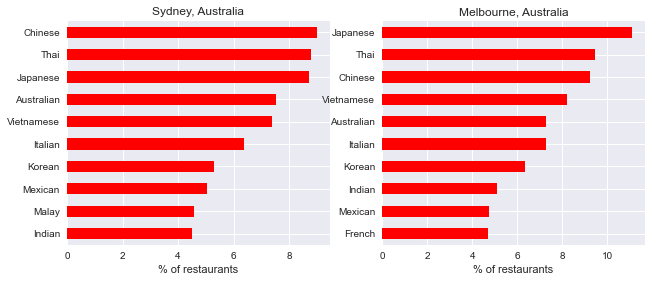

In [72]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.style.use(['seaborn'])

fig = plt.figure()
for index, city in enumerate(cities):
    ax = fig.add_subplot(3, 3, index+1)

    cuisines = cuisines_city_normalized.loc[city]
    cuisines = cuisines.sort_values(ascending=False).head(10).sort_values(ascending=True)

    cuisines.plot(kind='barh', ax=ax, figsize=(16, 14), color=list(color))
    ax.set_title(city)
    ax.set_xlabel("% of restaurants")

We can see that Chinese, Japanese and Thai are among the top three most popular cuisines in Sydney and Melboure. Therefore, our analysis recommends to open Chinese, Japanese or Thai restaurant in Australia.